<a href="https://colab.research.google.com/github/eku2005/FoodCaloriesPredict_finetune/blob/main/NutriVision_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍔 NutriVision
Train a ResNet50 model on Food-101 and estimate calories.

## 🔧 Step 1: Install Required Libraries

In [3]:
!pip install tensorflow keras opencv-python pandas matplotlib scikit-learn


## 📁 Step 2: Upload Your Dataset & CSV

In [5]:
from google.colab import files

print(" Upload your Food-101 'images' folder zipped (e.g. food-101-images.zip)")
uploaded = files.upload()

# Unzip
import zipfile
import os

for fn in uploaded.keys():
    if fn.endswith('.zip'):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall('subset')

print("Dataset extracted.")


 Upload your Food-101 'images' folder zipped (e.g. food-101-images.zip)


Saving subset.zip to subset.zip
Dataset extracted.


In [6]:
!ls

sample_data  subset  subset.zip


In [7]:
!ls subset/subset/

apple_pie   chicken_curry  french_fries  pad_thai
cheesecake  dumplings	   lasagna


### 📥 Upload `calorie_lookup.csv`

In [8]:
uploaded = files.upload()


Saving calorie_lookup.csv to calorie_lookup.csv


## 📚 Step 3: Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input


## 🧠 Step 4: Prepare Data Generators

In [10]:
dataset_path = 'subset/subset/'

datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 5600 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.


## 🔧 Step 5: Build and Train ResNet50

🔁 Starting Transfer Learning...
Epoch 1/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 39s 169ms/step - accuracy: 0.9961 - loss: 0.0132 - val_accuracy: 0.8464 - val_loss: 1.0307
Epoch 2/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - accuracy: 0.9839 - loss: 0.0502 - val_accuracy: 0.8693 - val_loss: 0.8020
Epoch 3/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 24s 138ms/step - accuracy: 0.9973 - loss: 0.0087 - val_accuracy: 0.8736 - val_loss: 0.7533
Epoch 4/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 25s 143ms/step - accuracy: 0.9987 - loss: 0.0048 - val_accuracy: 0.8786 - val_loss: 0.7367
Epoch 5/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 24s 135ms/step - accuracy: 0.9949 - loss: 0.0133 - val_accuracy: 0.8743 - val_loss: 0.7575

🔧 Starting Fine-Tuning...
Epoch 1/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 50s 188ms/step - accuracy: 0.9939 - loss: 0.0193 - val_accuracy: 0.8757 - val_loss: 0.7699
Epoch 2/5
175/175 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.8736 - val_loss: 0.7470
Epoch 3/5
175/175 ━━━━━━━━━━━━━

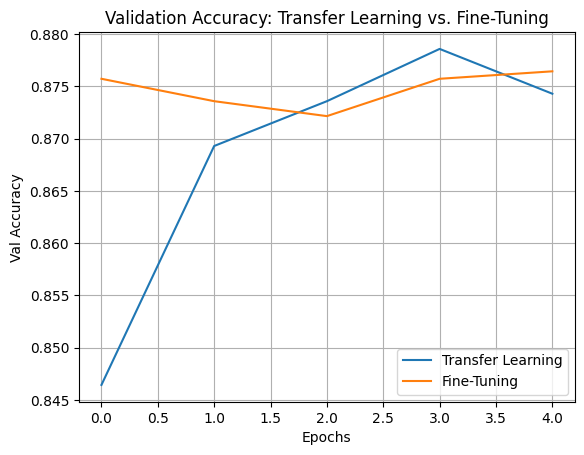

In [17]:
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- Transfer Learning Stage ---
# Freeze all layers in ResNet50 base
for layer in base_model.layers:
    layer.trainable = False

# Compile with default learning rate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train only the custom head
print("🔁 Starting Transfer Learning...")
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

# --- Fine-Tuning Stage ---
# Unfreeze the last 30 layers of base model
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Recompile with a lower learning rate
model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training full model
print("\n🔧 Starting Fine-Tuning...")
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

# --- Visual Comparison ---
plt.plot(history.history['val_accuracy'], label='Transfer Learning')
plt.plot(history_finetune.history['val_accuracy'], label='Fine-Tuning')
plt.title("Validation Accuracy: Transfer Learning vs. Fine-Tuning")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()


## 📈 Step 6: Plot Accuracy

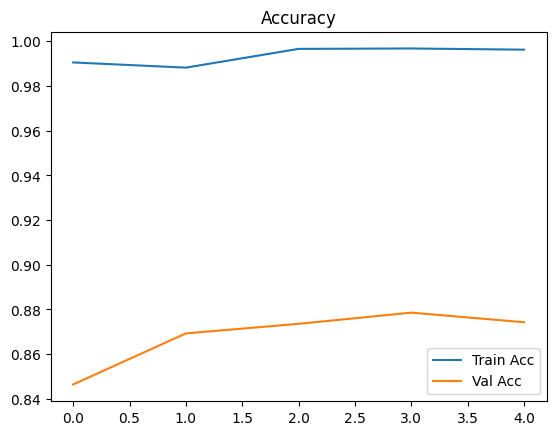

In [18]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.show()


## 💾 Step 7: Save Model

In [19]:
model.save("resnet50_finetuned.h5")
files.download("resnet50_finetuned.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🥗 Step 8: Predict & Estimate Calories

Saving COVER-1-1-scaled.jpg to COVER-1-1-scaled.jpg


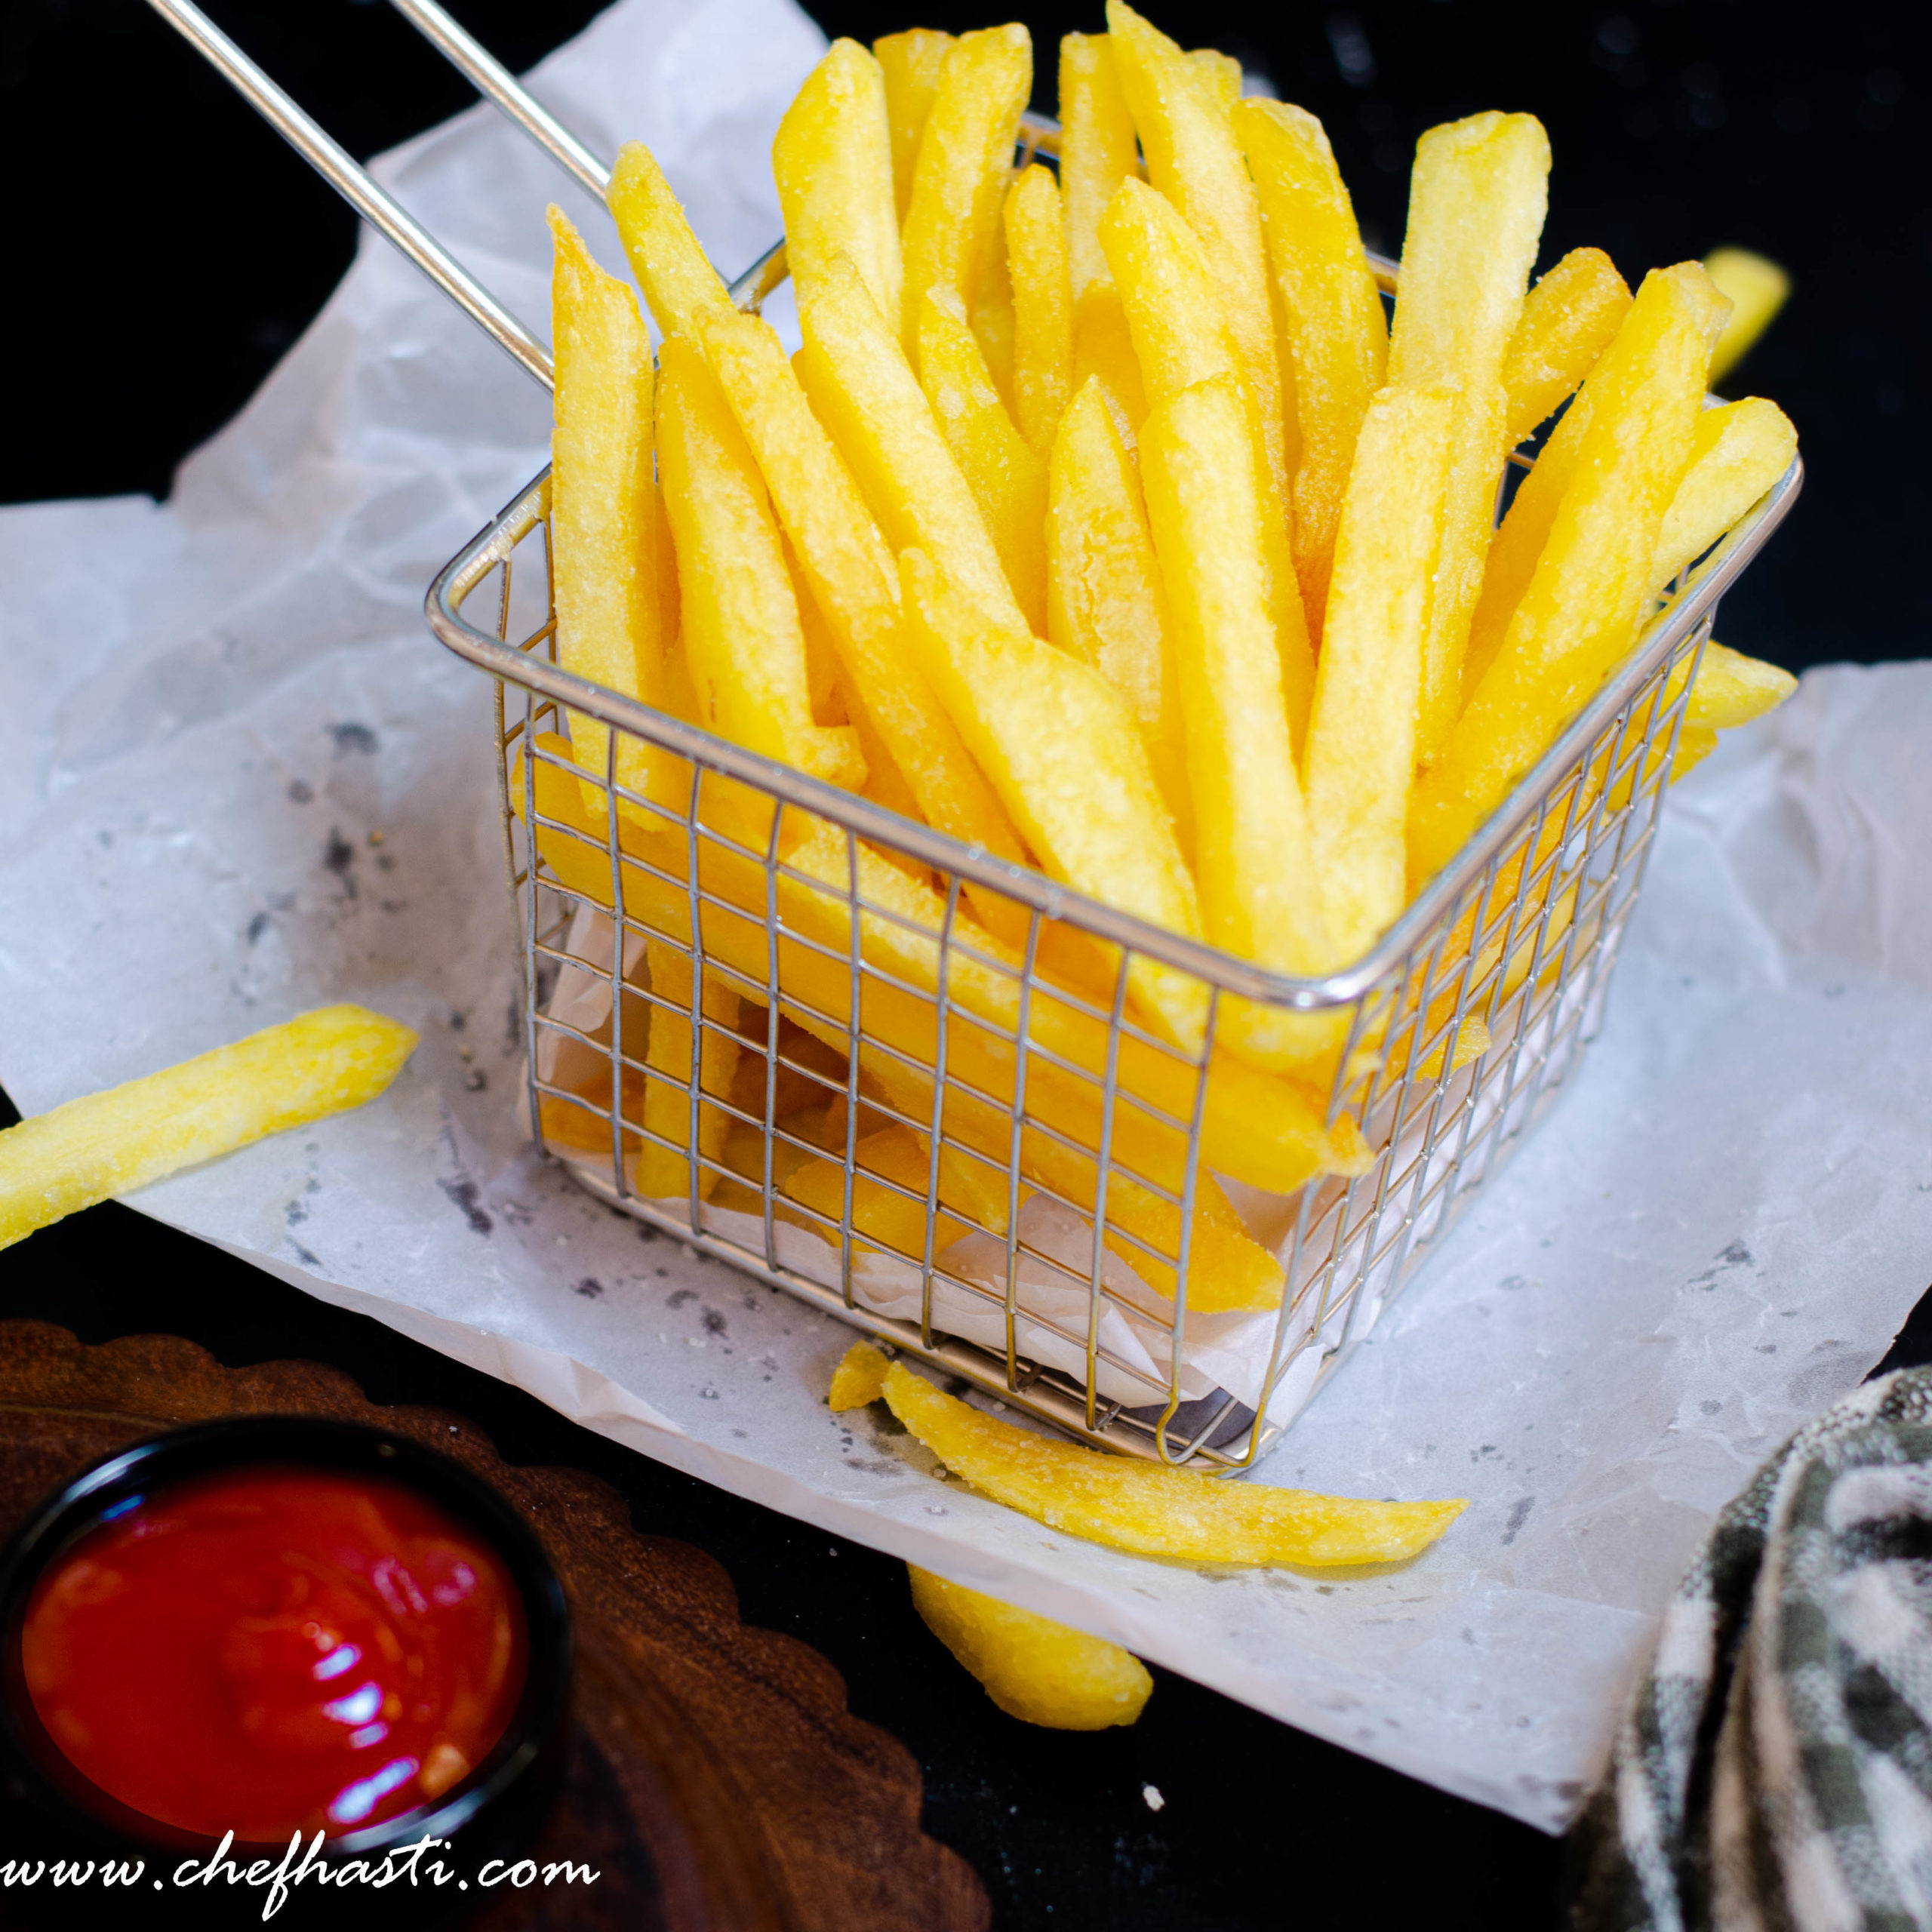

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
🍽 Predicted Food: french_fries
🔥 Estimated Calories: 312 kcal per 100g
🔍 Model Confidence: 90.55999755859375%


In [21]:
# --- Upload + Predict Cell (Colab Ready) ---
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load calorie data
calories = pd.read_csv("calorie_lookup.csv")

# Map index to label from training
index_to_label = {v: k for k, v in train_generator.class_indices.items()}

# Prediction + Calorie Estimation Function
def predict_and_estimate(image_path, model):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"❌ Could not read image: {image_path}")
    img = cv2.resize(img, (224, 224))
    img = preprocess_input(img)

    pred = model.predict(np.expand_dims(img, axis=0))
    label_idx = np.argmax(pred)
    predicted_label = index_to_label[label_idx]
    label_clean = predicted_label.replace('_', ' ')

    # Match with calorie CSV
    row = calories[calories['food_label'].str.lower() == label_clean.lower()]
    if not row.empty:
        kcal = row['avg_calories_per_100g'].values[0]
    else:
        kcal = "Unknown"

    confidence = round(np.max(pred) * 100, 2)
    return predicted_label, kcal, confidence

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Show image
img = cv2.imread(img_path)
if img is not None:
    cv2_imshow(img)
else:
    print("❌ Could not load image")

# Predict
label, kcal, conf = predict_and_estimate(img_path, model)
print(f"🍽 Predicted Food: {label}")
print(f"🔥 Estimated Calories: {kcal} kcal per 100g")
print(f"🔍 Model Confidence: {conf}%")



In [ ]:
!pip install gradio --quiet


In [ ]:
import gradio as gr
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load calorie lookup
calories = pd.read_csv("calorie_lookup.csv")
index_to_label = {v: k for k, v in train_generator.class_indices.items()}

# Prediction function
def classify_and_estimate(image):
    img = cv2.resize(image, (224, 224))
    img = preprocess_input(img)
    pred = model.predict(np.expand_dims(img, axis=0))[0]
    top3 = pred.argsort()[-3:][::-1]

    top_preds = []
    for i in top3:
        label = index_to_label[i]
        confidence = round(pred[i] * 100, 2)
        top_preds.append(f"{label} ({confidence}%)")

    top_label = index_to_label[top3[0]].replace('_', ' ')
    row = calories[calories['food_label'].str.lower() == top_label.lower()]
    kcal = row['avg_calories_per_100g'].values[0] if not row.empty else "Unknown"

    return f"Top Predictions:\n" + "\n".join(top_preds) + f"\n\nEstimated Calories: {kcal} kcal per 100g"

# Build interface
interface = gr.Interface(
    fn=classify_and_estimate,
    inputs=gr.Image(type="numpy", label="Upload Food Image"),
    outputs="text",
    title="🍽 NutriVision - Food & Calorie Estimator",
    description="Upload a food image to see the top 3 predicted classes and estimated calories"
)

# Launch app
interface.launch(debug=True)


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://0a47e8ef8ed26d1b65.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://0a47e8ef8ed26d1b65.gradio.live
